In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Algerian forest fire clean.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [5]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

In [6]:
df.drop(['day' , 'month' , 'year'] , axis=1 , inplace=True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [12]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder(categories=[['not fire' , 'fire']])
df['Classes']=encoder.fit_transform(df[['Classes']]).flatten()

In [13]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,0


In [15]:
df['Classes']=df['Classes'].astype(int)

In [16]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [17]:
X=df.drop('FWI' , axis=1)
y=df['FWI']

In [18]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [19]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=42)

In [21]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(182, 11) (182,)
(61, 11) (61,)


## Addressing the multicollinearity problem

In [23]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

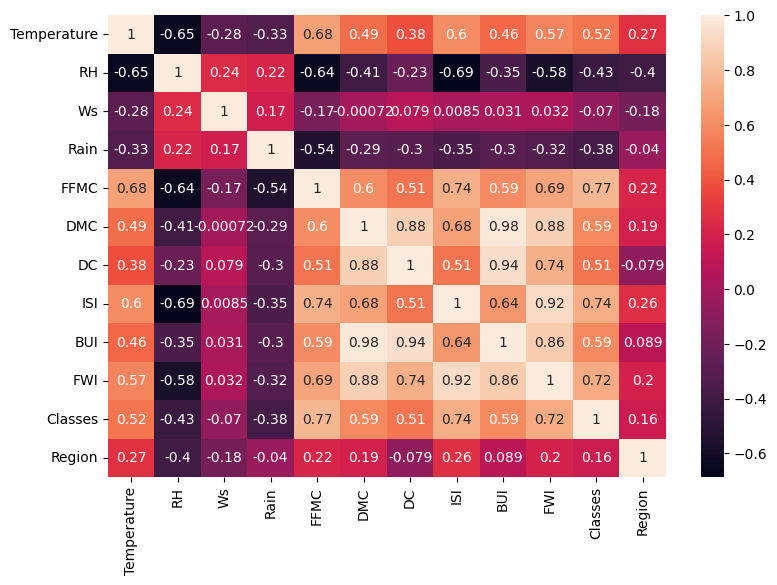

In [25]:
plt.figure(figsize=(9 , 6))
sns.heatmap(df.corr()  , annot=True)

In [34]:
def correlation(df , threshold):
    corr_set=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i , j]) > threshold:
                colname=corr_matrix.columns[i]
                corr_set.add(colname)
    return corr_set

In [36]:
corr_set=correlation(X_train , 0.85)
corr_set

{'BUI', 'DC'}

In [37]:
X_train.drop(corr_set , axis=1 , inplace=True)
X_test.drop(corr_set , axis=1  , inplace=True)

In [38]:
X_train.shape , X_test.shape

((182, 9), (61, 9))

## Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [40]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

## Boxplot to understand effects of Standardscaling

Text(0.5, 1.0, 'X_train after scaling')

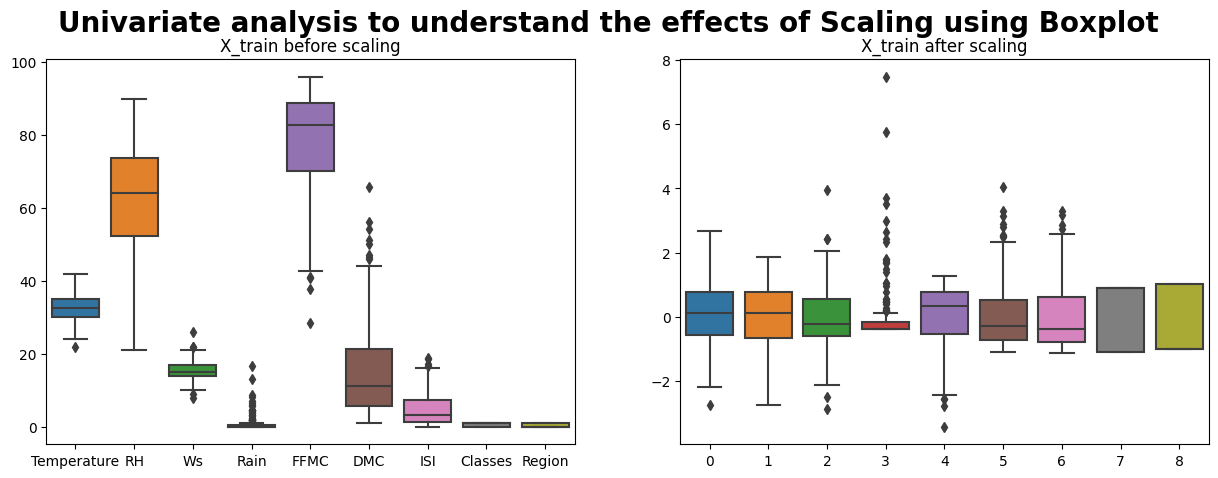

In [43]:
plt.figure(figsize=(15 , 5))
plt.suptitle("Univariate analysis to understand the effects of Scaling using Boxplot" , fontsize=20 , fontweight='bold')

plt.subplot(1 , 2 ,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')

plt.subplot(1 , 2 , 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')

## Linear regression 

In [55]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train_scaled , y_train)

LinearRegression()

In [56]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_pred=regressor.predict(X_test_scaled)
mae=round(mean_absolute_error(y_test , y_pred) , 2)
r2_score=round(r2_score(y_test , y_pred) , 2)
print(f"Mean absolute error : {mae}")
print(f"R2 Score : {r2_score}")

Mean absolute error : 0.55
R2 Score : 0.98


### Assumption plots

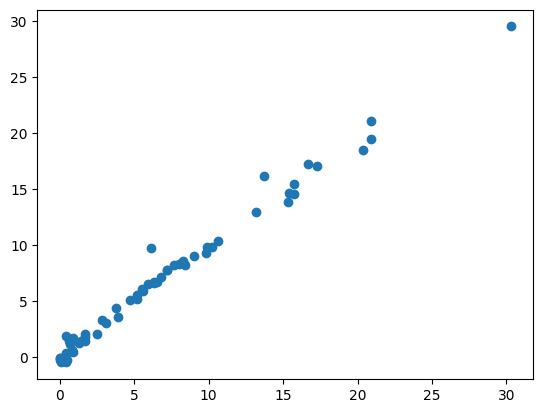

In [57]:
plt.scatter(y_test , y_pred)

C:\Users\Mohit\AppData\Local\Temp\ipykernel_2820\2608431249.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: xlabel='FWI', ylabel='Density'>

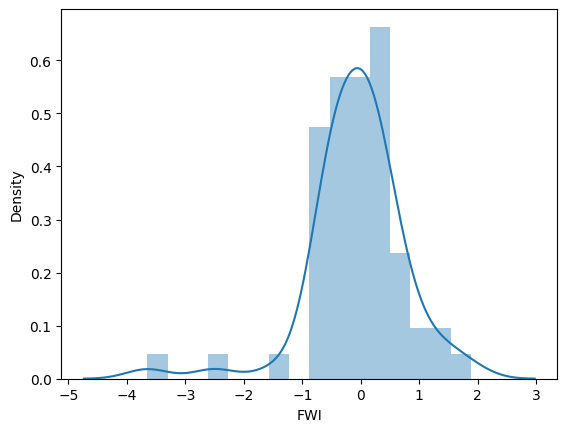

In [58]:
residual=y_test - y_pred
sns.distplot(residual)

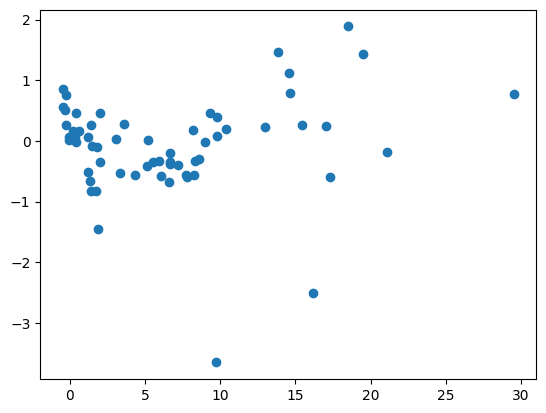

In [59]:
plt.scatter(y_pred  , residual)

## Lasso Regression

Mean absoluet error : 1.13
R2 score : 0.9492020263112388


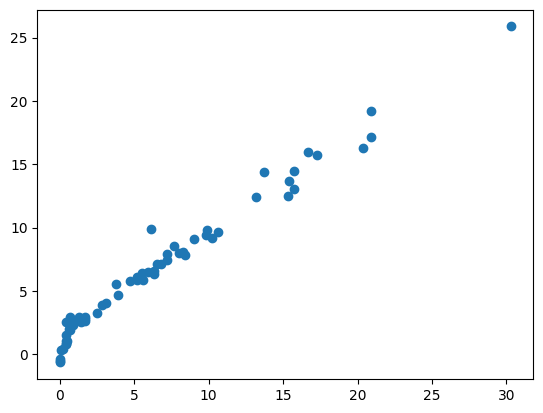

In [62]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
lasso =Lasso()
lasso.fit(X_train_scaled , y_train)
y_pred=lasso.predict(X_test_scaled)
mae=round(mean_absolute_error(y_test , y_pred) , 2)
score=r2_score(y_test  , y_pred)
print(f"Mean absoluet error : {mae}")
print(f"R2 score : {score}")
plt.scatter(y_test , y_pred)

In [54]:
y_test

24      8.4
6       7.2
152     0.5
232     3.8
238     6.5
       ... 
162     0.8
178     9.0
224     3.9
230    15.4
154     5.2
Name: FWI, Length: 61, dtype: float64

## Lasso cross validation

In [63]:
from sklearn.linear_model import LassoCV

lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled  , y_train)

LassoCV(cv=5)

MAE :0.6199701158263433
R2 Score : 0.9820946715928275


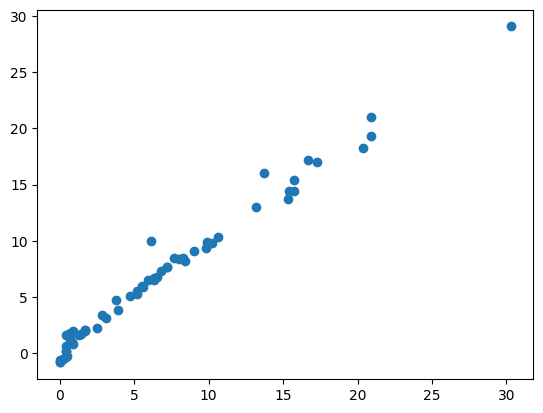

In [66]:
y_pred=lassocv.predict(X_test_scaled)
mae=mean_absolute_error(y_test , y_pred)
score=r2_score(y_test , y_pred)
print(f"MAE :{mae}")
print(f"R2 Score : {score}")
plt.scatter(y_test , y_pred)

## Ridge Regression

In [68]:
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge.fit(X_train_scaled , y_train)

Ridge()

MAE : 0.5642
Accuracy : 0.9843


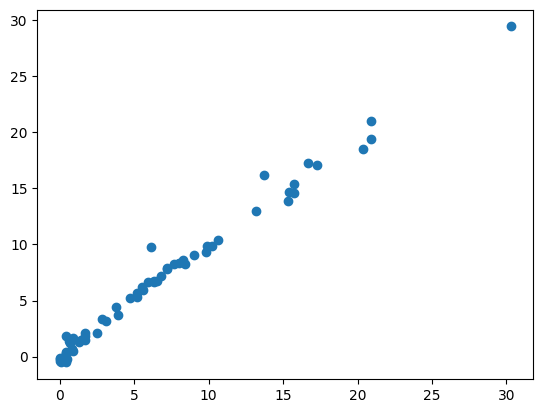

In [70]:
y_pred=ridge.predict(X_test_scaled)
mae=round(mean_absolute_error(y_test , y_pred) , 4)
score=round(r2_score(y_test , y_pred) , 4)
print(f"MAE : {mae}")
print(f"Accuracy : {score}")
plt.scatter(y_test  , y_pred)

## RidgeCV

In [73]:
from sklearn.linear_model import RidgeCV

ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled , y_train)

RidgeCV(cv=5)

MAE : 0.5642305340105691
Score : 0.9842993364555513


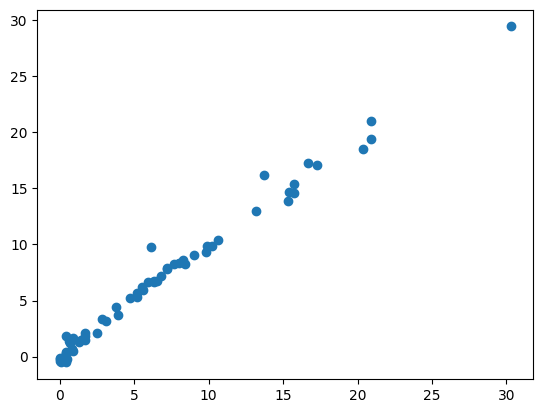

In [74]:
y_pred=ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(y_test , y_pred)
score=r2_score(y_test , y_pred)
print(f"MAE : {mae}")
print(f"Score : {score}")
plt.scatter(y_test, y_pred)

In [76]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

## Elastic Net

MAE : 1.8822353634896
Accuracy : 0.8753460589519703


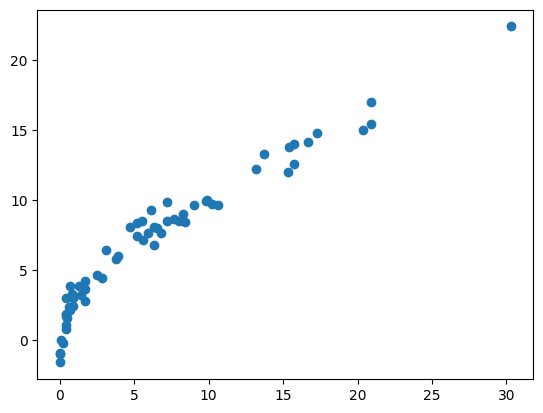

In [77]:
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet()
elasticnet.fit(X_train_scaled , y_train)
y_pred=elasticnet.predict(X_test_scaled)
mae=mean_absolute_error(y_test , y_pred)
score=r2_score(y_test , y_pred)
print(f"MAE : {mae}")
print(f"Accuracy : {score}")
plt.scatter(y_test , y_pred)

MAE : 0.6575946731430901
Accuracy : 0.9814217587854941


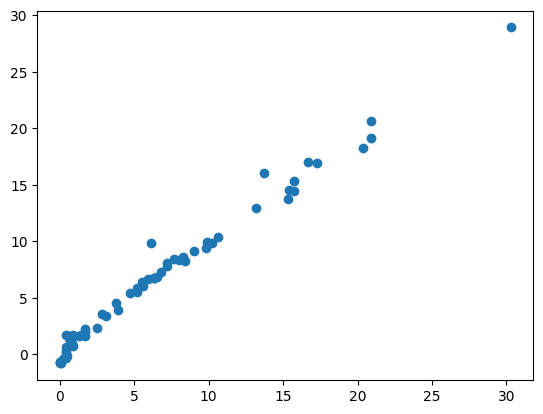

In [78]:
from sklearn.linear_model import ElasticNetCV

elasticnetcv=ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled , y_train)
y_pred=elasticnetcv.predict(X_test_scaled)
mae=mean_absolute_error(y_test , y_pred)
score=r2_score(y_test , y_pred)
print(f"MAE : {mae}")
print(f"Accuracy : {score}")
plt.scatter(y_test , y_pred)

In [79]:
elasticnetcv.alphas_

array([1.41170600e+01, 1.31656174e+01, 1.22782989e+01, 1.14507826e+01,
       1.06790382e+01, 9.95930678e+00, 9.28808283e+00, 8.66209714e+00,
       8.07830078e+00, 7.53385034e+00, 7.02609405e+00, 6.55255882e+00,
       6.11093829e+00, 5.69908150e+00, 5.31498248e+00, 4.95677045e+00,
       4.62270071e+00, 4.31114616e+00, 4.02058933e+00, 3.74961507e+00,
       3.49690356e+00, 3.26122397e+00, 3.04142839e+00, 2.83644629e+00,
       2.64527931e+00, 2.46699633e+00, 2.30072904e+00, 2.14566760e+00,
       2.00105679e+00, 1.86619226e+00, 1.74041714e+00, 1.62311885e+00,
       1.51372607e+00, 1.41170600e+00, 1.31656174e+00, 1.22782989e+00,
       1.14507826e+00, 1.06790382e+00, 9.95930678e-01, 9.28808283e-01,
       8.66209714e-01, 8.07830078e-01, 7.53385034e-01, 7.02609405e-01,
       6.55255882e-01, 6.11093829e-01, 5.69908150e-01, 5.31498248e-01,
       4.95677045e-01, 4.62270071e-01, 4.31114616e-01, 4.02058933e-01,
       3.74961507e-01, 3.49690356e-01, 3.26122397e-01, 3.04142839e-01,
      

## Pickle the most accurate model 

In [80]:
scaler

StandardScaler()

In [82]:
Ridge()

Ridge()

In [83]:
import pickle

pickle.dump(scaler, open('scaler.pkl' , 'wb'))
pickle.dump(ridge , open('scaler.pkl'  , 'wb' ))